In [5]:
import torch
x = torch.arange(4, dtype=torch.float32)
x

tensor([0., 1., 2., 3.])

In [6]:
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [8]:
y =  2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [9]:
y.backward()

In [12]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [13]:
# verify since gradient of x would be 4x

x.grad == 4 * x

tensor([True, True, True, True])

In [14]:
# since pytorch accumulates values by default we needto clear it but lets try without

y = x.sum()
y.backward()
x.grad

tensor([ 1.,  5.,  9., 13.])

In [17]:
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [21]:
y = x.sum()
y.backward()
x.grad, y

(tensor([4., 4., 4., 4.]), tensor(6., grad_fn=<SumBackward0>))

In [22]:
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [26]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [28]:
y = x * x # gradient 2x

In [30]:
y

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)

In [31]:
try:
    y.backward()
except Exception as e:
    print(e)
    
# since y is not a scalar it throws error

grad can be implicitly created only for scalar outputs


In [33]:
y.sum().backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved variables after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved variables after calling backward.

In [35]:
x.grad

tensor([0., 2., 4., 6.])

In [47]:
# without detach

x.grad.zero_()

y =  x*x
u = y
z = u * x

z

tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>)

In [48]:
z.sum().backward()

x.grad, u

(tensor([ 0.,  3., 12., 27.]),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [49]:
# trying detach

x.grad.zero_()
y = x * x
u = y.detach()
z= u * x

z.sum().backward

x.grad, u.grad, u

(tensor([0., 0., 0., 0.]), None, tensor([0., 1., 4., 9.]))

In [50]:
x.grad.zero_()

y.sum().backward()

x.grad, 2 * x

(tensor([0., 2., 4., 6.]), tensor([0., 2., 4., 6.], grad_fn=<MulBackward0>))

In [61]:
# we can find gradient of a complex function

def f(x, a):
    
    if (x.norm()< 100):
        a = a* 2
    else :
        x =x * 2
    
    return a * x

In [58]:
a =  torch.arange(5,1,-1, dtype=torch.float32)

In [59]:
a.requires_grad_(True)

tensor([5., 4., 3., 2.], requires_grad=True)

In [62]:
z = f(x,a)

In [64]:
z

tensor([ 0.,  8., 12., 12.], grad_fn=<MulBackward0>)

In [65]:
z.sum().backward()

In [67]:
x.grad, a.grad

(tensor([10., 10., 10., 10.]), tensor([0., 2., 4., 6.]))

### Exercises
1. Why is the second derivative much more expensive to compute than the first derivative?
2. After running the function for backpropagation, immediately run it again and see what happens.
3. In the control flow example where we calculate the derivative of d with respect to a, what
would happen if we changed the variable a to a random vector or matrix. At this point, the
result of the calculation f(a) is no longer a scalar. What happens to the result? How do we
analyze this?
4. Redesign an example of finding the gradient of the control flow. Run and analyze the result.
5. Let f(x) = sin(x). Plot f(x) and df(x)
dx , where the latter is computed without exploiting that
f
′
(x) = cos(x).

In [68]:
#1 because perhaps computing it would take more complex operations

In [69]:
#2

x = torch.arange(4, dtype=torch.float32)

In [73]:
x.requires_grad_(True)

tensor([0., 1., 2., 3.], requires_grad=True)

In [74]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [76]:
y = 2 + torch.dot(x*x, x) # 3x^2 gradient

In [77]:
y

tensor(38., grad_fn=<AddBackward0>)

In [78]:
y.backward()

In [81]:
try:
    y.backward()
except Exception as e:
    print(e)

Trying to backward through the graph a second time (or directly access saved variables after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved variables after calling backward.


In [80]:
x.grad

tensor([ 0.,  3., 12., 27.])

In [83]:
#3

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [84]:
a = torch.randn(size=(), requires_grad=True)
a

tensor(0.2924, requires_grad=True)

In [85]:
d = f(a)

In [86]:
d.backward()

In [88]:
a.grad

tensor(4096.)

In [90]:
# Now replacing a with a tensor

a = torch.randn((2,3), requires_grad=True)

a.grad

In [92]:
d = f(a)

In [94]:
try:
    d.backward()
except Exception as e:
    print(e)
    
# it means graph is making vector as a result for each of the values

grad can be implicitly created only for scalar outputs


Note that it is piecewise linear in its input a. In
other words, for any a there exists some constant scalar k such that f(a) = k * a, where the value
of k depends on the input a. Consequently d / a allows us to verify that the gradient is correct.

In [152]:
#4

x = torch.arange(0,4.1,0.1, dtype=torch.float32)

In [153]:
x.requires_grad_(True)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000], requires_grad=True)

In [154]:
import numpy as np

def find_sin(x):
#     d = []
#     for i in range(len(x)):
#         d.append(math.sin(x[i]))
#     return np.array(d)
    return torch.sin(x)

In [155]:
find_sin(x)

tensor([ 0.0000,  0.0998,  0.1987,  0.2955,  0.3894,  0.4794,  0.5646,  0.6442,
         0.7174,  0.7833,  0.8415,  0.8912,  0.9320,  0.9636,  0.9854,  0.9975,
         0.9996,  0.9917,  0.9738,  0.9463,  0.9093,  0.8632,  0.8085,  0.7457,
         0.6755,  0.5985,  0.5155,  0.4274,  0.3350,  0.2392,  0.1411,  0.0416,
        -0.0584, -0.1577, -0.2555, -0.3508, -0.4425, -0.5298, -0.6119, -0.6878,
        -0.7568], grad_fn=<SinBackward>)

In [156]:
y = find_sin(x)

In [157]:
y.sum().backward()

In [158]:
x.grad

tensor([ 1.0000,  0.9950,  0.9801,  0.9553,  0.9211,  0.8776,  0.8253,  0.7648,
         0.6967,  0.6216,  0.5403,  0.4536,  0.3624,  0.2675,  0.1700,  0.0707,
        -0.0292, -0.1288, -0.2272, -0.3233, -0.4161, -0.5048, -0.5885, -0.6663,
        -0.7374, -0.8011, -0.8569, -0.9041, -0.9422, -0.9710, -0.9900, -0.9991,
        -0.9983, -0.9875, -0.9668, -0.9365, -0.8968, -0.8481, -0.7910, -0.7259,
        -0.6536])

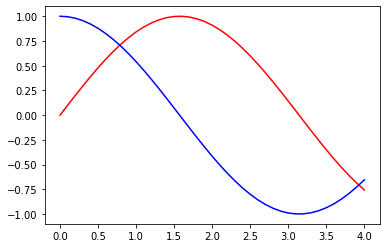

In [159]:
import matplotlib.pyplot as plt

plt.plot(x.detach(), find_sin(x.detach()), 'r')
plt.plot(x.detach(), x.grad, 'b')
